In [2]:
#! pip install wordcloud

     ------------------------------------ 299.8/299.8 KB 218.0 kB/s eta 0:00:00


You should consider upgrading via the 'c:\_venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from string import punctuation
from collections import defaultdict
import traceback

In [4]:
text = "Hello, Hello, Hello, world!"

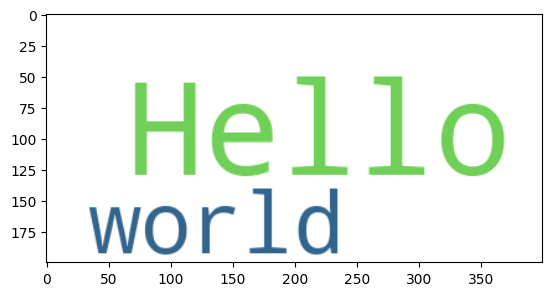

In [5]:
wc=WordCloud(stopwords = " ",background_color="white",max_words=100).generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [6]:
print(text.split())

['Hello,', 'Hello,', 'Hello,', 'world!']


In [7]:
all_text = ''.join([letter for letter in text if letter not in punctuation])

In [8]:
print(all_text)

Hello Hello Hello world


In [9]:
print(all_text.split())

['Hello', 'Hello', 'Hello', 'world']


In [10]:
words_list = all_text.split()

In [11]:
words_dict = defaultdict(int)
for word in words_list:
    words_dict[word] += 1

In [12]:
words_sorted_dict = {k:v for k,v in sorted(words_dict.items(), key = lambda x: x[1], reverse=True)}

In [13]:
print(words_sorted_dict)

{'Hello': 3, 'world': 1}


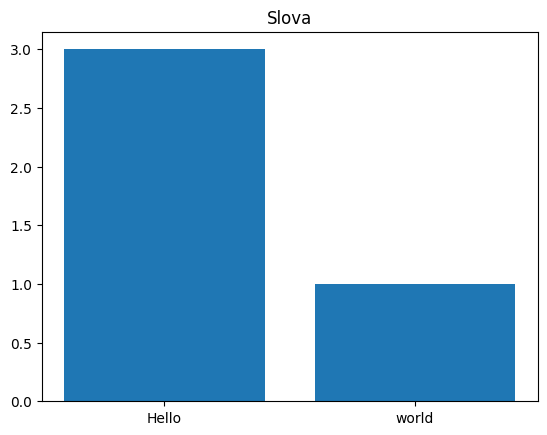

In [14]:
plt.bar(words_sorted_dict.keys(), words_sorted_dict.values())
plt.title("Slova")
plt.show()

In [15]:
words_sorted_dict = {k:v for k,v in sorted(words_dict.items(), key = lambda x: x[1], reverse=True)[:10]}

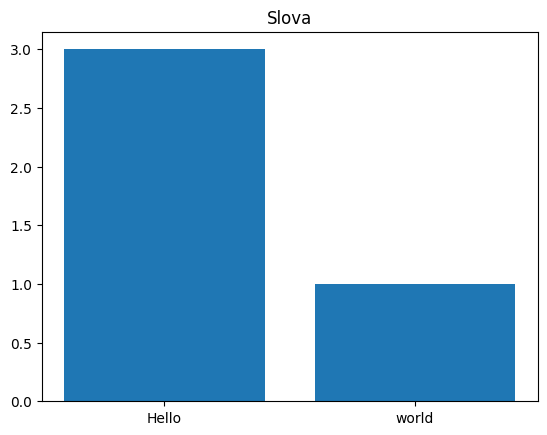

In [16]:
plt.bar(words_sorted_dict.keys(), words_sorted_dict.values())
plt.title("Slova")
plt.show()

In [17]:
words_sorted_dict = {k:v for k,v in sorted(words_dict.items(), key = lambda x: x[1], reverse=True)[:10][::-1]}

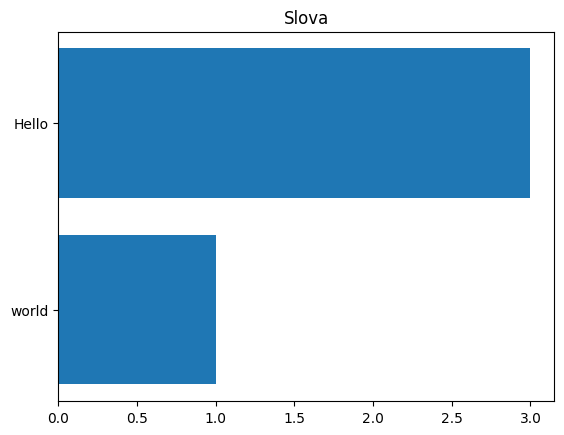

In [18]:
plt.barh(range(len(words_sorted_dict)), words_sorted_dict.values())
plt.yticks(range(len(words_sorted_dict)), words_sorted_dict.keys())
plt.title("Slova")
plt.show()

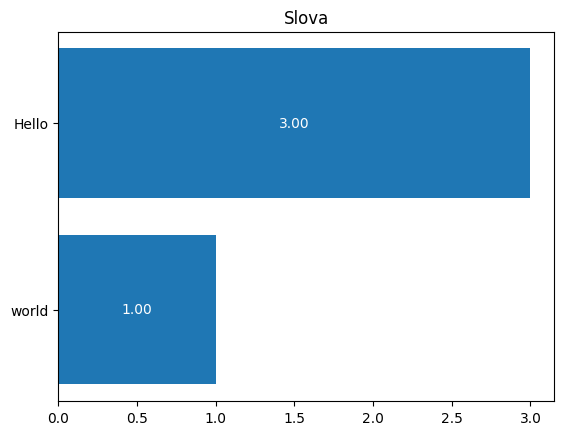

In [19]:
rects = plt.barh(range(len(words_sorted_dict)), words_sorted_dict.values())
for rect in rects:
    plt.annotate(text = '{:,.2f}'.format(rect.get_width()), xy = (rect.get_width()/2, rect.get_y() + rect.get_height()/2), ha = 'center', va = 'center', color = 'white')
plt.yticks(range(len(words_sorted_dict)), words_sorted_dict.keys())
plt.title("Slova")
plt.show()

In [20]:
pocet_slov = len(all_text.split())
pocet_slov

4

In [21]:
words_sorted_perc_dict = {k:(v/pocet_slov) for k,v in list(words_sorted_dict.items())}

In [22]:
words_sorted_perc_dict

{'world': 0.25, 'Hello': 0.75}

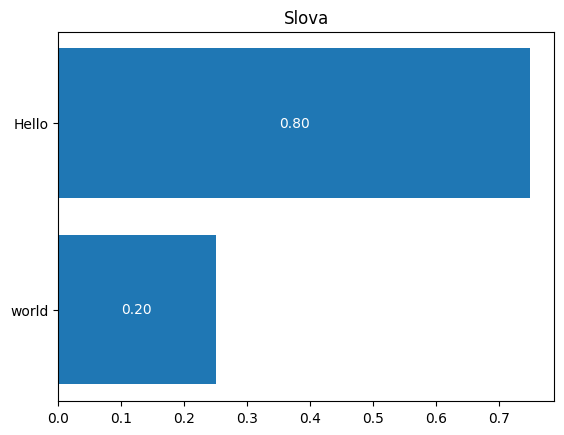

In [23]:
rects = plt.barh(range(len(words_sorted_perc_dict)), words_sorted_perc_dict.values())
for rect in rects:
    plt.annotate(text = '{:,.2f}'.format(rect.get_width().round(1)), xy = (rect.get_width()/2, rect.get_y() + rect.get_height()/2), ha = 'center', va = 'center', color = 'white')
plt.yticks(range(len(words_sorted_perc_dict)), words_sorted_perc_dict.keys())
plt.title("Slova")
plt.show()

3 zlé věci:
    - musím psát složitý kód stále znovu
    - musím opravovat názvy stále znovu
    - zaokrouhlování funguje špatně (číslo končící 5 se má zaokrouhlovat vždy nahoru)

In [24]:
def rd(number: float, precision: int = 1) -> str:
    '''
    Returns rounded string with defined precicion.

    INPUT:
    number: float, to be rounded
    precision: int, precision used whe rounding

    OUTPUT:
    round_str: str
    '''
    
    num, prec = None, None

    if isinstance(number, float):
        num = number
    else:
        try:
            num = float(number)
        except Exception as e:
            traceback.print_exc()
            pass

    if isinstance(precision, int):
        if precision >= 0:
            prec = precision
        else:
            prec = abs(precision)
    else:
        try:
            prec = abs(int(precision))
        except Exception as e:
            traceback.print_exc()
            pass

    assert num is not None, '\nPlease specify valid number\n'
    assert prec is not None, '\nPlease specify valid precision\n'

    fin = 1
    if num < 0: fin = -1
    num1 = num*10**prec
    if abs(num1 - int(num1)) >= .5:
        num1 += fin
    round_float = int(num1)/10**prec
    round_str = '{num:.{prec}f}'.format(num=round_float,prec=prec).replace('.', ',')
    return round_str

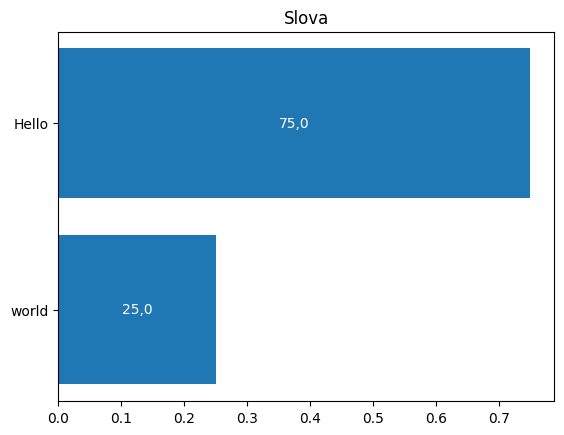

In [25]:
rects = plt.barh(range(len(words_sorted_perc_dict)), words_sorted_perc_dict.values())
for rect in rects:
    plt.annotate(text = rd(rect.get_width()*100, 1), xy = (rect.get_width()/2, rect.get_y() + rect.get_height()/2), ha = 'center', va = 'center', color = 'white')
plt.yticks(range(len(words_sorted_perc_dict)), words_sorted_perc_dict.keys())
plt.title("Slova")
plt.show()

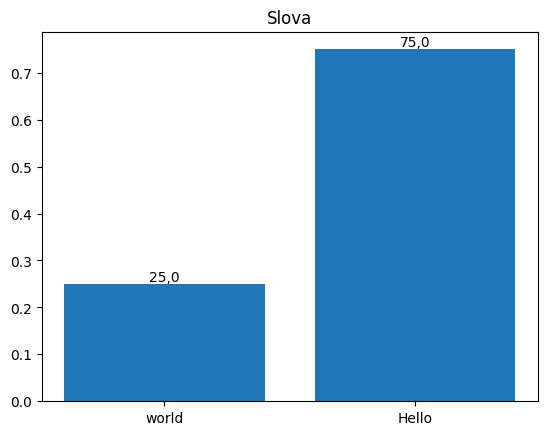

In [26]:
rects = plt.bar(range(len(words_sorted_perc_dict)), words_sorted_perc_dict.values())
for rect in rects:
    plt.annotate(text = rd(rect.get_height()*100, 1), xy = (rect.get_x() + rect.get_width()/2, rect.get_height()), ha = 'center', va = 'bottom', color = 'black')
plt.xticks(range(len(words_sorted_perc_dict)), words_sorted_perc_dict.keys())
plt.title("Slova")
plt.show()

In [27]:
import sys
sys.executable

'c:\\_venv\\Scripts\\python.exe'

In [28]:
import os
os.getcwd()

'c:\\_venv\\_venv\\Common_words_analysis'